# A World Away: Hunting for Exoplanets with AI

https://www.spaceappschallenge.org/2025/challenges/a-world-away-hunting-for-exoplanets-with-ai/?tab=details

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. **Kepler Data:** 
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

In [8]:
# COLS NAMES:
# COLUMN kepid:          KepID
# COLUMN kepoi_name:     KOI Name
# COLUMN kepler_name:    Kepler Name
# COLUMN koi_disposition: Exoplanet Archive Disposition
# COLUMN koi_pdisposition: Disposition Using Kepler Data
# COLUMN koi_score:      Disposition Score
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag
# COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag
# COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
# COLUMN koi_period:     Orbital Period [days]
# COLUMN koi_period_err1: Orbital Period Upper Unc. [days]
# COLUMN koi_period_err2: Orbital Period Lower Unc. [days]
# COLUMN koi_time0bk:    Transit Epoch [BKJD]
# COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
# COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
# COLUMN koi_impact:     Impact Parameter
# COLUMN koi_impact_err1: Impact Parameter Upper Unc.
# COLUMN koi_impact_err2: Impact Parameter Lower Unc.
# COLUMN koi_duration:   Transit Duration [hrs]
# COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]
# COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs]
# COLUMN koi_depth:      Transit Depth [ppm]
# COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm]
# COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm]
# COLUMN koi_prad:       Planetary Radius [Earth radii]
# COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
# COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
# COLUMN koi_teq:        Equilibrium Temperature [K]
# COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
# COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
# COLUMN koi_insol:      Insolation Flux [Earth flux]
# COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
# COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
# COLUMN koi_model_snr:  Transit Signal-to-Noise
# COLUMN koi_tce_plnt_num: TCE Planet Number
# COLUMN koi_tce_delivname: TCE Delivery
# COLUMN koi_steff:      Stellar Effective Temperature [K]
# COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
# COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
# COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
# COLUMN koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
# COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
# COLUMN koi_srad:       Stellar Radius [Solar radii]
# COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
# COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
# COLUMN ra:             RA [decimal degrees]
# COLUMN dec:            Dec [decimal degrees]
# COLUMN koi_kepmag:     Kepler-band [mag]"]
cols_kepler=["kepoi_name","kepler_name","koi_disposition","koi_pdisposition","koi_score","koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co",
             "koi_fpflag_ec","koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1","koi_time0bk_err2",
             "koi_impact","koi_impact_err1","koi_impact_err2","koi_duration","koi_duration_err1","koi_duration_err2","koi_depth",
             "koi_depth_err1","koi_depth_err2","koi_prad","koi_prad_err1","koi_prad_err2","koi_teq","koi_teq_err1","koi_teq_err2",
             "koi_insol","koi_insol_err1","koi_insol_err2","koi_model_snr","koi_tce_plnt_num","koi_tce_delivname","koi_steff","koi_steff_err1",
             "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad","koi_srad_err1","koi_srad_err2","ra","dec","koi_kepmag"]
kepler=pd.read_csv("Kepler_Data.csv", skiprows=53)#,names=cols_kepler, 

In [9]:
kepler

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


## 2. **TESS Data:** 
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI

In [12]:
# COLS NAMES:
# COLUMN toi:            TESS Object of Interest
# COLUMN tid:            TESS Input Catalog ID
# COLUMN tfopwg_disp:    TFOPWG Dispostion (CP | FP | KP | PC)
# COLUMN rastr:          RA [sexagesimal]
# COLUMN ra:             RA [deg]
# COLUMN decstr:         Dec [sexagesimal]
# COLUMN dec:            Dec [deg]
# COLUMN st_pmra:        PMRA [mas/yr]
# COLUMN st_pmraerr1:    PMRA Upper Unc [mas/yr]
# COLUMN st_pmraerr2:    PMRA Lower Unc [mas/yr]
# COLUMN st_pmralim:     PMRA Limit Flag
# COLUMN st_pmdec:       PMDec [mas/yr]
# COLUMN st_pmdecerr1:   PMDec Upper Unc [mas/yr]
# COLUMN st_pmdecerr2:   PMDec Lower Unc [mas/yr]
# COLUMN st_pmdeclim:    PMDec Limit Flag
# COLUMN pl_tranmid:     Planet Transit Midpoint Value [BJD]
# COLUMN pl_tranmiderr1: Planet Transit Midpoint Upper Unc [BJD]
# COLUMN pl_tranmiderr2: Planit Transit Midpoint Lower Unc [BJD]
# COLUMN pl_tranmidlim:  Planet Transit Midpoint Limit Flag
# COLUMN pl_orbper:      Planet Orbital Period Value [days]
# COLUMN pl_orbpererr1:  Planet Orbital Period Upper Unc [days]
# COLUMN pl_orbpererr2:  Planet Orbital Period Lower Unc [days]
# COLUMN pl_orbperlim:   Planet Orbital Period Limit Flag
# COLUMN pl_trandurh:    Planet Transit Duration Value [hours]
# COLUMN pl_trandurherr1: Planet Transit Duration Upper Unc [hours]
# COLUMN pl_trandurherr2: Planet Transit Duration Lower Unc [hours]
# COLUMN pl_trandurhlim: Planet Transit Duration Limit Flag
# COLUMN pl_trandep:     Planet Transit Depth Value [ppm]
# COLUMN pl_trandeperr1: Planet Transit Depth Upper Unc [ppm]
# COLUMN pl_trandeperr2: Planet Transit Depth Lower Unc [ppm]
# COLUMN pl_trandeplim:  Planet Transit Depth Limit Flag
# COLUMN pl_rade:        Planet Radius Value [R_Earth]
# COLUMN pl_radeerr1:    Planet Radius Upper Unc [R_Earth]
# COLUMN pl_radeerr2:    Planet Radius Lower Unc [R_Earth]
# COLUMN pl_radelim:     Planet Radius Limit Flag
# COLUMN pl_insol:       Planet Insolation Value [Earth flux]
# COLUMN pl_insolerr1:   Planet Insolation Upper Unc [Earth flux]
# COLUMN pl_insolerr2:   Planet Insolation Lower Unc [Earth flux]
# COLUMN pl_insollim:    Planet Insolation Limit Flag
# COLUMN pl_eqt:         Planet Equilibrium Temperature Value [K]
# COLUMN pl_eqterr1:     Planet Equilibrium Temperature Upper Unc [K]
# COLUMN pl_eqterr2:     Planet Equilibrium Temperature Lower Unc [K]
# COLUMN pl_eqtlim:      Planet Equilibrium Temperature Limit Flag
# COLUMN st_tmag:        TESS Magnitude
# COLUMN st_tmagerr1:    TESS Magnitude Upper Unc
# COLUMN st_tmagerr2:    TESS Magnitude Lower Unc
# COLUMN st_tmaglim:     TESS Magnitude Limit Flag
# COLUMN st_dist:        Stellar Distance [pc]
# COLUMN st_disterr1:    Stellar Distance Upper Unc [pc]
# COLUMN st_disterr2:    Stellar Distance Lower Unc [pc]
# COLUMN st_distlim:     Stellar Distance Limit Flag
# COLUMN st_teff:        Stellar Effective Temperature Value [K]
# COLUMN st_tefferr1:    Stellar Effective Termperature Upper Unc [K]
# COLUMN st_tefferr2:    Stellar Effective Temperature Lower Unc [K]
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag
# COLUMN st_logg:        Stellar log(g) Value [cm/s**2]
# COLUMN st_loggerr1:    Stellar log(g) Upper Unc [cm/s**]
# COLUMN st_loggerr2:    Stellar log(g) Lower Unc [cm/s**2]
# COLUMN st_logglim:     Stellar log(g) Limit Flag
# COLUMN st_rad:         Stellar Radius Value [R_Sun]
# COLUMN st_raderr1:     Stellar Radius Upper Unc [R_Sun]
# COLUMN st_raderr2:     Stellar Radius Lower Unc [R_Sun]
# COLUMN st_radlim:      Stellar Radius Limit Flag
# COLUMN toi_created:    TOI Created Date
# COLUMN rowupdate:      Date Modified
cols_tess=["toi","tid","tfopwg_disp","rastr","ra","decstr","dec","st_pmra","st_pmraerr1","st_pmraerr2","st_pmralim","st_pmdec","st_pmdecerr1",
             "st_pmdecerr2","st_pmdeclim","pl_tranmid","pl_tranmiderr1","pl_tranmiderr2","pl_tranmidlim","pl_orbper","pl_orbpererr1","pl_orbpererr2",
             "pl_orbperlim","pl_trandurh","pl_trandurherr1","pl_trandurherr2","pl_trandurhlim","pl_trandep","pl_trandeperr1","pl_trandeperr2",
             "pl_trandeplim","pl_rade","pl_radeerr1","pl_radeerr2","pl_radelim","pl_insol","pl_insolerr1","pl_insolerr2","pl_insollim","pl_eqt",
             "pl_eqterr1","pl_eqterr2","pl_eqtlim","st_tmag","st_tmagerr1","st_tmagerr2","st_tmaglim","st_dist","st_disterr1","st_disterr2","st_distlim",
             "st_teff","st_tefferr1","st_tefferr2","st_tefflim","st_logg","st_loggerr1","st_loggerr2","st_logglim","st_rad","st_raderr1","st_raderr2",
             "st_radlim","toi_created","rowupdate"]
tess=pd.read_csv("TESS_Data.csv", skiprows=69)#, names=cols_tess

In [13]:
tess

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.169860,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.010000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.730000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.150000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,995.01,317951248,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,0.405,-0.405,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7695,996.01,142918609,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,0.848,-0.848,...,NaN,NaN,NaN,0,2.050000,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7696,997.01,341729521,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,0.044,-0.044,...,4.52,0.08,-0.08,0,0.926261,0.045789,-0.045789,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7697,998.01,54390047,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,0.069,-0.069,...,4.01,0.07,-0.07,0,2.349860,0.091578,-0.091578,0,2019-07-24 15:58:33,2024-09-09 10:08:01


## 3. **K2 Mission Data:** 
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=k2pandc

In [14]:
# COLS NAMES:
# COLUMN pl_name:        Planet Name
# COLUMN hostname:       Host Name
# COLUMN default_flag:   Default Parameter Set
# COLUMN disposition:    Archive Disposition
# COLUMN disp_refname:   Archive Disposition Reference
# COLUMN sy_snum:        Number of Stars
# COLUMN sy_pnum:        Number of Planets
# COLUMN discoverymethod: Discovery Method
# COLUMN disc_year:      Discovery Year
# COLUMN disc_facility:  Discovery Facility
# COLUMN soltype:        Solution Type
# COLUMN pl_controv_flag: Controversial Flag
# COLUMN pl_refname:     Planetary Parameter Reference
# COLUMN pl_orbper:      Orbital Period [days]
# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days]
# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days]
# COLUMN pl_orbperlim:   Orbital Period Limit Flag
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]
# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]
# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
# COLUMN pl_rade:        Planet Radius [Earth Radius]
# COLUMN pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]
# COLUMN pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]
# COLUMN pl_radelim:     Planet Radius Limit Flag
# COLUMN pl_radj:        Planet Radius [Jupiter Radius]
# COLUMN pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius]
# COLUMN pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius]
# COLUMN pl_radjlim:     Planet Radius Limit Flag
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]
# COLUMN pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.
# COLUMN pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.
# COLUMN pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
# COLUMN pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.
# COLUMN pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.
# COLUMN pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag
# COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance
# COLUMN pl_orbeccen:    Eccentricity
# COLUMN pl_orbeccenerr1: Eccentricity Upper Unc.
# COLUMN pl_orbeccenerr2: Eccentricity Lower Unc.
# COLUMN pl_orbeccenlim: Eccentricity Limit Flag
# COLUMN pl_insol:       Insolation Flux [Earth Flux]
# COLUMN pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux]
# COLUMN pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux]
# COLUMN pl_insollim:    Insolation Flux Limit Flag
# COLUMN pl_eqt:         Equilibrium Temperature [K]
# COLUMN pl_eqterr1:     Equilibrium Temperature Upper Unc. [K]
# COLUMN pl_eqterr2:     Equilibrium Temperature Lower Unc. [K]
# COLUMN pl_eqtlim:      Equilibrium Temperature Limit Flag
# COLUMN ttv_flag:       Data show Transit Timing Variations
# COLUMN st_refname:     Stellar Parameter Reference
# COLUMN st_spectype:    Spectral Type
# COLUMN st_teff:        Stellar Effective Temperature [K]
# COLUMN st_tefferr1:    Stellar Effective Temperature Upper Unc. [K]
# COLUMN st_tefferr2:    Stellar Effective Temperature Lower Unc. [K]
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag
# COLUMN st_rad:         Stellar Radius [Solar Radius]
# COLUMN st_raderr1:     Stellar Radius Upper Unc. [Solar Radius]
# COLUMN st_raderr2:     Stellar Radius Lower Unc. [Solar Radius]
# COLUMN st_radlim:      Stellar Radius Limit Flag
# COLUMN st_mass:        Stellar Mass [Solar mass]
# COLUMN st_masserr1:    Stellar Mass Upper Unc. [Solar mass]
# COLUMN st_masserr2:    Stellar Mass Lower Unc. [Solar mass]
# COLUMN st_masslim:     Stellar Mass Limit Flag
# COLUMN st_met:         Stellar Metallicity [dex]
# COLUMN st_meterr1:     Stellar Metallicity Upper Unc. [dex]
# COLUMN st_meterr2:     Stellar Metallicity Lower Unc. [dex]
# COLUMN st_metlim:      Stellar Metallicity Limit Flag
# COLUMN st_metratio:    Stellar Metallicity Ratio
# COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)]
# COLUMN st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
# COLUMN st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
# COLUMN st_logglim:     Stellar Surface Gravity Limit Flag
# COLUMN sy_refname:     System Parameter Reference
# COLUMN rastr:          RA [sexagesimal]
# COLUMN ra:             RA [deg]
# COLUMN decstr:         Dec [sexagesimal]
# COLUMN dec:            Dec [deg]
# COLUMN sy_dist:        Distance [pc]
# COLUMN sy_disterr1:    Distance [pc] Upper Unc
# COLUMN sy_disterr2:    Distance [pc] Lower Unc
# COLUMN sy_vmag:        V (Johnson) Magnitude
# COLUMN sy_vmagerr1:    V (Johnson) Magnitude Upper Unc
# COLUMN sy_vmagerr2:    V (Johnson) Magnitude Lower Unc
# COLUMN sy_kmag:        Ks (2MASS) Magnitude
# COLUMN sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc
# COLUMN sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc
# COLUMN sy_gaiamag:     Gaia Magnitude
# COLUMN sy_gaiamagerr1: Gaia Magnitude Upper Unc
# COLUMN sy_gaiamagerr2: Gaia Magnitude Lower Unc
# COLUMN rowupdate:      Date of Last Update
# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date
# COLUMN releasedate:    Release Date
# COLUMN sy_disterr2:    Distance [pc] Lower Unc
# COLUMN sy_vmag:        V (Johnson) Magnitude
# COLUMN sy_vmagerr1:    V (Johnson) Magnitude Upper Unc
# COLUMN sy_vmagerr2:    V (Johnson) Magnitude Lower Unc
# COLUMN sy_kmag:        Ks (2MASS) Magnitude
# COLUMN sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc
# COLUMN sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc
# COLUMN sy_gaiamag:     Gaia Magnitude
# COLUMN sy_gaiamagerr1: Gaia Magnitude Upper Unc
# COLUMN sy_gaiamagerr2: Gaia Magnitude Lower Unc
# COLUMN rowupdate:      Date of Last Update
# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date
# COLUMN releasedate:    Release Date
cols_k2=["pl_name","hostname","default_flag","disposition","disp_refname","sy_snum","sy_pnum","discoverymethod","disc_year","disc_facility",
         "soltype","pl_controv_flag","pl_refname","pl_orbper","pl_orbpererr1","pl_orbpererr2","pl_orbperlim","pl_orbsmax","pl_orbsmaxerr1",
         "pl_orbsmaxerr2","pl_orbsmaxlim","pl_rade","pl_radeerr1","pl_radeerr2","pl_radelim","pl_radj","pl_radjerr1","pl_radjerr2","pl_radjlim",
         "pl_bmasse","pl_bmasseerr1","pl_bmasseerr2","pl_bmasselim","pl_bmassj","pl_bmassjerr1","pl_bmassjerr2","pl_bmassjlim","pl_bmassprov",
         "pl_orbeccen","pl_orbeccenerr1","pl_orbeccenerr2","pl_orbeccenlim","pl_insol","pl_insolerr1","pl_insolerr2","pl_insollim","pl_eqt",
         "pl_eqterr1","pl_eqterr2","pl_eqtlim","ttv_flag","st_refname","st_spectype","st_teff","st_tefferr1","st_tefferr2","st_tefflim","st_rad",
         "st_raderr1","st_raderr2","st_radlim","st_mass","st_masserr1","st_masserr2","st_masslim","st_met","st_meterr1","st_meterr2","st_metlim",
         "st_metratio","st_logg","st_loggerr1","st_loggerr2","st_logglim","sy_refname","rastr","ra","decstr","dec","sy_dist","sy_disterr1",
         "sy_disterr2","sy_vmag","sy_vmagerr1","sy_vmagerr2","sy_kmag","sy_kmagerr1","sy_kmagerr2","sy_gaiamag","sy_gaiamagerr1","sy_gaiamagerr2",
         "rowupdate","pl_pubdate","releasedate"]
k2=pd.read_csv("K2_Mission_Data.csv", skiprows=98)#, names=cols_k2

In [15]:
k2

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.86440,0.000249,-0.000249,2018-04-25,2018-03,2018-02-15
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.86440,0.000249,-0.000249,2018-04-25,2016-10,2016-07-28
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,...,-0.012,9.368,0.018,-0.018,10.86440,0.000249,-0.000249,2018-04-25,2017-03,2018-04-26
3,EPIC 201111557.01,EPIC 201111557,1,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,...,-0.046,9.220,0.019,-0.019,11.39950,0.001307,-0.001307,2018-08-02,2018-08,2018-08-02
4,EPIC 201111557.01,EPIC 201111557,0,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,...,-0.046,9.220,0.019,-0.019,11.39950,0.001307,-0.001307,2018-02-15,2018-03,2018-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,WASP-85 A b,WASP-85 A,0,CONFIRMED,Mo&#x10D;nik et al. 2016,2,1,Transit,2016,K2,...,-0.010,8.733,0.026,-0.026,10.62410,0.000959,-0.000959,2019-09-05,2019-09,2019-09-05
4000,Wolf 503 b,Wolf 503,1,CONFIRMED,Peterson et al. 2018,1,1,Transit,2018,K2,...,-0.030,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2022-05-23,2021-12,2022-05-23
4001,Wolf 503 b,Wolf 503,0,CONFIRMED,Peterson et al. 2018,1,1,Transit,2018,K2,...,-0.030,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2018-09-04,2018-11,2018-09-06
4002,Wolf 503 b,Wolf 503,0,CONFIRMED,Peterson et al. 2018,1,1,Transit,2018,K2,...,-0.030,7.617,0.023,-0.023,9.89816,0.000337,-0.000337,2023-04-17,2023-04,2023-04-17


# **Vamos con Kepler Data para empezar**

- **1. ¿Qué queremos predecir?** La variable natural de destino es:
    - koi_disposition (o también koi_pdisposition si quieren basarse solo en los datos de Kepler).
    - Valores típicos: CONFIRMED, CANDIDATE, FALSE POSITIVE.
    - Pueden simplificar a binario (CONFIRMED/PLANET vs NO PLANET), o mantener las tres clases.
- **2. Columnas que conviene descartar**
    - Identificadores: `kepid`, `kepoi_name`, `kepler_name`, `koi_tce_delivname`. → Son IDs, no aportan información científica.
    - Duplicados de etiquetas: Si ya usan koi_disposition, pueden ignorar koi_pdisposition y koi_score (aunque koi_score podría usarse como feature auxiliar si quieren).
    - Flags de falsos positivos (`koi_fpflag_*`): Estos flags ya codifican si algo no es planeta. Incluirlos puede hacer el modelo trivial (el modelo solo aprendería a repetir la etiqueta). Mejor descartarlos si buscan generalización.
    - RA, Dec: Posición en el cielo; no suele influir físicamente en si es planeta o no. Pueden descartar.
- **3. Columnas que sí tienen sentido conservar** Estas son las físicas relevantes para transitos y propiedades estelares:
    - Parámetros orbitales y del tránsito
        - `koi_period` (período orbital)
        - `koi_time0bk` (época del tránsito) — a veces no es útil directamente, pero puede derivarse fase.
        - `koi_impact` (parámetro de impacto)
        - `koi_duration` (duración del tránsito)
        - `koi_depth` (profundidad del tránsito)
        - `koi_model_snr` (relación señal/ruido del tránsito)
    - Propiedades planetarias derivadas
        - `koi_prad` (radio del planeta)
        - `koi_teq` (temperatura de equilibrio)
        - `koi_insol` (flujo de insolación)
    - Propiedades estelares
        - `koi_steff` (temperatura efectiva estelar)
        - `koi_slogg` (log g, gravedad superficial)
        - `koi_srad` (radio estelar)
        - `koi_kepmag` (magnitud en banda Kepler)
- **4. Columnas de incertidumbre** `*_err1`, `*_err2`:
    - Estas son importantes porque indican calidad de la medición. Opciones:
        - Calcular ancho de incertidumbre = err1 – err2.
        - Usar solo la magnitud absoluta de error.
        - O descartarlas
- **5. Resumen de features recomendados**
    - Un subset balanceado de columnas para empezar:
        - `koi_period`
        - `koi_impact`
        - `koi_duration`
        - `koi_depth`
        - `koi_prad`
        - `koi_teq`
        - `koi_insol`
        - `koi_model_snr`
        - `koi_steff`
        - `koi_slogg`
        - `koi_srad`
        - `koi_kepmag`
        - Opcional: `koi_score`, anchos de incertidumbre (`*_err1` - `*_err2`).
- **6. Plan de acción en el hackathon**
    - Limpieza
    - Quitar columnas irrelevantes.
    - Tratar NaNs (p. ej. imputación simple).
    - Balanceo de clases
        - Seguro hay más false positives que confirmed. Pueden usar undersampling, SMOTE o ponderación de clases.
    - Modelo rápido y robusto
        - RandomForest o LightGBM → fáciles, buen baseline, interpretables con feature importance.
    - Métricas
        - AUC, F1-score, confusion matrix → muy importantes en datasets desbalanceados.

In [16]:
## Ver balance de clases (koi_disposition)
kepler["koi_disposition"].value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

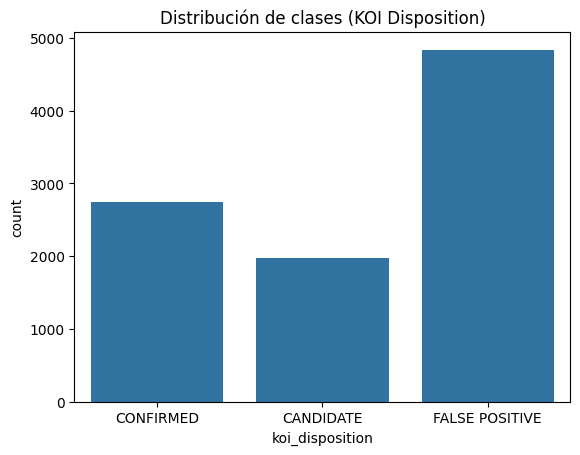

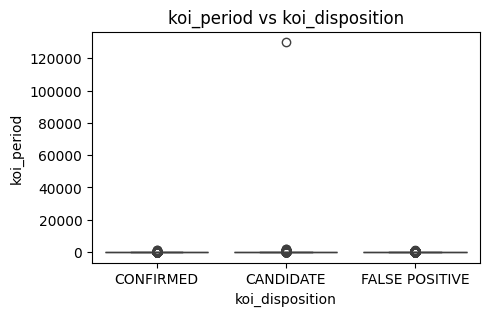

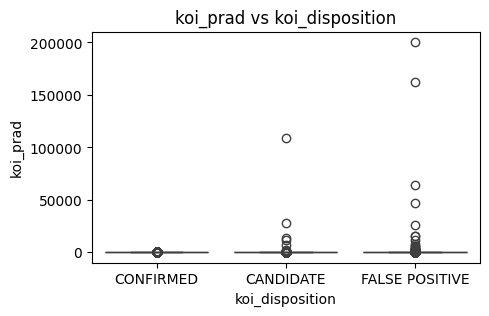

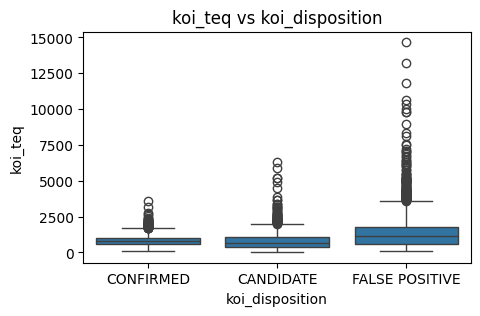

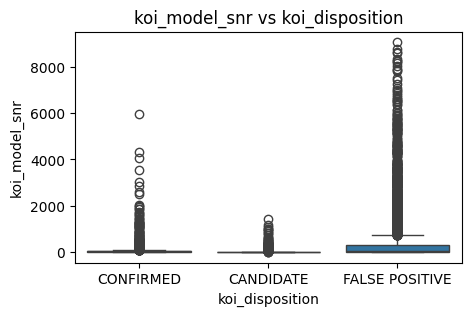

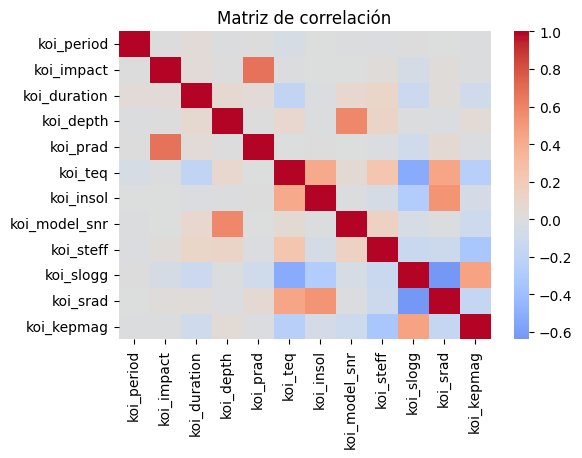

In [46]:
## Exploratory Data Analysis (EDA)
## Un vistazo rápido ayuda a entender qué variables diferencian planetas confirmados de falsos positivos.

import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de clases
sns.countplot(x="koi_disposition", data=kepler)
plt.title("Distribución de clases (KOI Disposition)")
plt.show()

# Boxplots para comparar confirmados vs falsos positivos
cols_check = ["koi_period", "koi_prad", "koi_teq", "koi_model_snr"]
for col in cols_check:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="koi_disposition", y=col, data=kepler)
    plt.title(f"{col} vs koi_disposition")
    plt.show()

# Correlación numérica
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

In [17]:
## Selección de columnas relevantes
# Features recomendados
features = [
    "koi_period",
    "koi_impact",
    "koi_duration",
    "koi_depth",
    "koi_prad",
    "koi_teq",
    "koi_insol",
    "koi_model_snr",
    "koi_steff",
    "koi_slogg",
    "koi_srad",
    "koi_kepmag"
]

target = "koi_disposition"

X = kepler[features]
y = kepler[target]

In [18]:
## Preprocesamiento
## Valores faltantes → imputar con media/mediana.
## Escalado → no siempre necesario en árboles (RandomForest/LightGBM), pero útil para redes.

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputación de NaN
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Codificar etiquetas
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

In [20]:
## Modelo inicial (baseline rápido)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

     CANDIDATE       0.57      0.48      0.52       396
     CONFIRMED       0.82      0.83      0.82       549
FALSE POSITIVE       0.81      0.86      0.84       968

      accuracy                           0.77      1913
     macro avg       0.73      0.72      0.73      1913
  weighted avg       0.76      0.77      0.77      1913



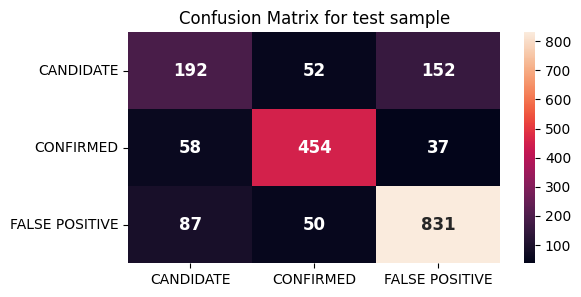

In [39]:
import seaborn as sns
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='d', annot_kws={"fontsize":12,"fontweight":"bold"})
plt.title("Confusion Matrix for test sample")
plt.xticks(np.arange(0.5,3.5,1),le.classes_,ha="center")
plt.yticks(np.arange(0.5,3.5,1),le.classes_,va="center",rotation=0)
plt.show()

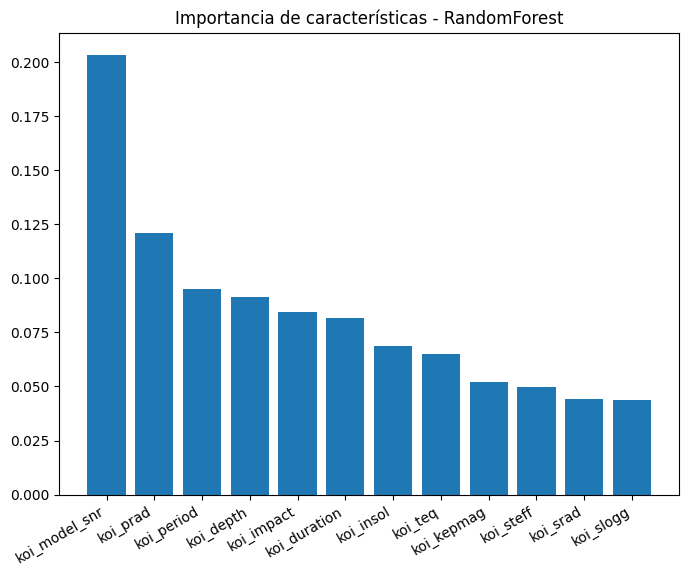

In [43]:
## Interpretabilidad: importancia de variables
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=30, ha="right")
plt.title("Importancia de características - RandomForest")
plt.show()

In [48]:
kepler["koi_pdisposition"].value_counts()

koi_pdisposition
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64